In [1]:
import numpy as np
import sacc

In [14]:
sb = sacc.Sacc.load_fits('../../TXPipe/data/desy1/outputs/gammat_bright_stars.sacc')
sd = sacc.Sacc.load_fits('../../TXPipe/data/desy1/outputs/gammat_dim_stars.sacc')

/opt/conda/lib/python3.9/site-packages/sacc/data_types.py:301: UserWarning: Unknown data_type value galaxyStar_shearDensity_xi_t. If possible use a pre-defined type, or add to the list.
  warnings.warn(f"Unknown data_type value {data_type}. "


In [15]:
sb.get_data_types()

['galaxyStar_shearDensity_xi_t']

In [16]:
sb_thetaxi = sb.get_theta_xi('galaxyStar_shearDensity_xi_t','source2d','bright_stars')

In [17]:
sd.get_tracer_combinations('galaxyStar_shearDensity_xi_t')

[('source2d', 'dim_stars')]

In [18]:
sb.get_tag('theta')

[2.756900469557764,
 3.315207617873442,
 3.9867494346308106,
 4.794331797548319,
 5.765478500644429,
 6.933220108838065,
 8.337587704949684,
 10.026890017266698,
 12.056951407062352,
 14.499178526865364,
 17.43621953744422,
 20.96738369733398,
 25.214362632091007,
 30.320164831811486,
 36.46236576696446,
 43.846274149653354,
 52.72849914483798,
 63.40193848814183,
 76.24876258621981,
 91.68860693159083]

In [19]:
sd_thetaxi = sd.get_theta_xi('galaxyStar_shearDensity_xi_t','source2d','dim_stars')

In [20]:
sb_thetaxi

(array([ 2.75690047,  3.31520762,  3.98674943,  4.7943318 ,  5.7654785 ,
         6.93322011,  8.3375877 , 10.02689002, 12.05695141, 14.49917853,
        17.43621954, 20.9673837 , 25.21436263, 30.32016483, 36.46236577,
        43.84627415, 52.72849914, 63.40193849, 76.24876259, 91.68860693]),
 array([-7.27945690e-06,  4.44832783e-07,  2.65188350e-05,  2.53480703e-06,
        -2.12689580e-06,  1.44476018e-05, -6.53945218e-06,  3.19750208e-06,
        -3.44206078e-06,  1.91051262e-06,  5.17435758e-06,  5.91827328e-06,
         1.14694819e-06, -5.29618072e-07, -1.78844057e-06, -1.38275393e-05,
        -1.20994457e-05, -1.49739483e-06, -5.71082067e-06,  4.82209681e-06]))

In [21]:
sb_err = sb.get_tag('error')

In [22]:
sb_err=np.array(sb_err)

In [23]:
sb_err

array([1.83142769e-05, 1.52720705e-05, 1.27364435e-05, 1.06166762e-05,
       8.84603013e-06, 7.37055243e-06, 6.14355284e-06, 5.11348868e-06,
       4.25982427e-06, 3.55196296e-06, 2.95985554e-06, 2.46649685e-06,
       2.05558045e-06, 1.71515476e-06, 1.43170261e-06, 1.19529816e-06,
       9.98209095e-07, 8.34661068e-07, 6.99170372e-07, 5.85668223e-07])

In [24]:
sd_err = np.array(sd.get_tag('error'))

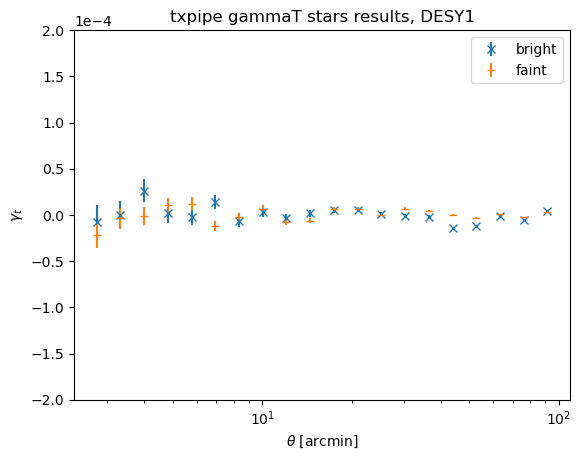

In [25]:
import matplotlib.pyplot as plt
plt.errorbar(sb_thetaxi[0],sb_thetaxi[1],sb_err,marker='x',linestyle='None',label='bright')
plt.errorbar(sd_thetaxi[0],sd_thetaxi[1],sd_err,marker='_',linestyle='None',label='faint')
plt.xscale('log')
plt.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2e-4,2e-4))
plt.ylim([-2e-4,2e-4])
plt.xlabel(r'$\theta$ [arcmin]')
plt.ylabel(r'$\gamma_t$')
plt.title('txpipe gammaT stars results, DESY1')
plt.savefig('../plots/desy1_gammaTstars.png')